<a href="https://colab.research.google.com/github/Sinrez/PythonProjects/blob/main/1_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка временного ряда из файла
data = pd.read_csv('/content/task5_224427.csv')
data.head()

,y
0,2
1,21
2,34
3,37
4,37


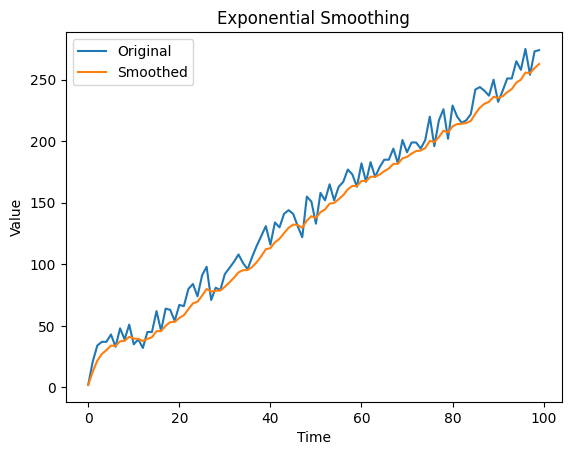

Сглаженное значение для 51-ой точки ряда: 137.67157702019625
Сглаженное окр значение для 51-ой точки ряда: 137.67


In [6]:
# Применение экспоненциального сглаживания
smoothing_factor = 0.23
smoothed_data = data.ewm(alpha=smoothing_factor).mean()

# Получение значения для 51-ой точки
point_51 = smoothed_data.iloc[50]['y']

# Визуализация исходного ряда и сглаженного ряда
plt.plot(data.index, data['y'], label='Original')
plt.plot(smoothed_data.index, smoothed_data['y'], label='Smoothed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing')
plt.show()

print(f"Сглаженное значение для 51-ой точки ряда: {point_51}")
print(f"Сглаженное окр значение для 51-ой точки ряда: {round(point_51,2)}")

In [8]:
last_point = smoothed_data.iloc[-1]
print(f"Сглаженное значение для последней точки ряда: {last_point}")

Сглаженное значение для последней точки ряда: y    262.762618
Name: 99, dtype: float64


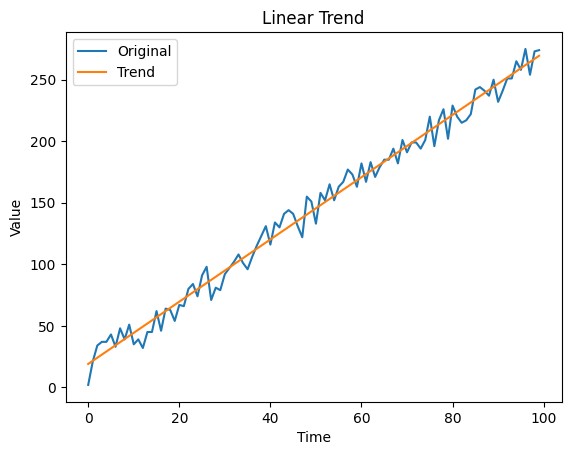

Коэффициенты линейного тренда: a = 2.53, b = 19.04


In [9]:
# Получение значений x и y для линейного тренда
x = np.arange(len(data))
y = data['y']

# Подгонка линейного тренда
coefficients = np.polyfit(x, y, 1)
a = coefficients[0]
b = coefficients[1]

# Построение линейного тренда
trend = a * x + b

# Визуализация исходного ряда и линейного тренда
plt.plot(x, y, label='Original')
plt.plot(x, trend, label='Trend')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Trend')
plt.show()

print(f"Коэффициенты линейного тренда: a = {a:.2f}, b = {b:.2f}")

In [10]:
# Коэффициент детерминации (R-квадрат)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - trend) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"Коэффициент детерминации (R-квадрат): {r_squared:.2f}")

Коэффициент детерминации (R-квадрат): 0.99


In [11]:
# Прогнозирование 101-ого значения ряда
next_x = 100  # 101-ое значение имеет индекс 100
forecast = a * next_x + b

print(f"Прогноз 101-ого значения ряда: {forecast:.2f}")

Прогноз 101-ого значения ряда: 271.99
